1. Import The Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

2. Load The Dataset

In [4]:
train = pd.read_csv("train.csv")
print("Training set:" , train.columns, train.shape, len(train))
test = pd.read_csv("test.csv")
print("Test Set:" , test.columns, test.shape, len(test))

print("\n",train.head())
print("\n",test.head())

Training set: Index(['id', 'label', 'tweet'], dtype='object') (31962, 3) 31962
Test Set: Index(['id', 'tweet'], dtype='object') (17197, 2) 17197

    id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

       id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


3. Data Cleaning

In [5]:
print(train.isnull().sum())
print(test.isnull().sum())

train.drop_duplicates(inplace=True)
print(train.shape)
test.drop_duplicates(inplace=True)
print(test.shape)

id       0
label    0
tweet    0
dtype: int64
id       0
tweet    0
dtype: int64
(31962, 3)
(17197, 2)


4. Text Preprocessing

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    cleaned_text = ' '.join(words)
    return cleaned_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


5. Cleaning

In [13]:
train['clean_tweet'] = train['tweet'].apply(clean_text)
test['clean_tweet'] = test['tweet'].apply(clean_text)
train[['tweet', 'clean_tweet']].head(10)


,tweet,clean_tweet
0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit cant use cause do...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,model love u take u time urð ðððð ððð
4,factsguide: society now #motivation,factsguide society motivation
5,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay disp...
6,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user user user...
7,the next school year is the year for exams.ð...,next school year year examsð cant think ð scho...
8,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champion cleveland clevel...
9,@user @user welcome here ! i'm it's so #gr...,user user welcome im gr


6. Feature Extarction

In [14]:
tfidf = TfidfVectorizer(
    max_features=5000,       
    stop_words='english'     
)
X = tfidf.fit_transform(train['clean_tweet'])  
y = train['label']                             


7. Model Training

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (Linear)": LinearSVC()
}
results = {}

for name, model in models.items():
    print(f"\nTraining {name}:\n")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    print(f"Accuracy for {name}: {acc:.4f}")
    print(classification_report(y_test, preds))
    results[name] = acc


Training Logistic Regression:

Accuracy for Logistic Regression: 0.9507
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.34      0.50       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393


Training Naive Bayes:

Accuracy for Naive Bayes: 0.9518
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.94      0.35      0.51       456

    accuracy                           0.95      6393
   macro avg       0.94      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393


Training Random Forest:

Accuracy for Random Forest: 0.9551
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5937
           1       0.80      0.49      0.61   

8. Model Comparision

In [16]:
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("\nModel Comparison:\n", results_df)


Model Comparison:
                  Model  Accuracy
0  Logistic Regression  0.950727
1          Naive Bayes  0.951822
2        Random Forest  0.955107
3         SVM (Linear)  0.958705


9. Visualize The Confusion Matrix

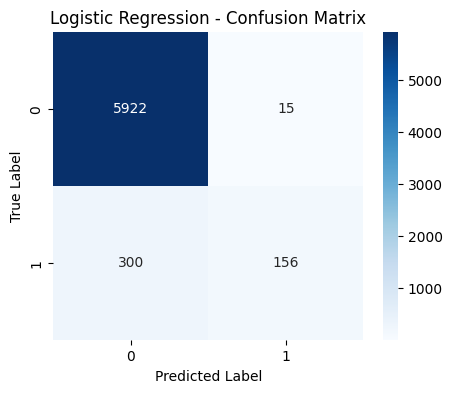

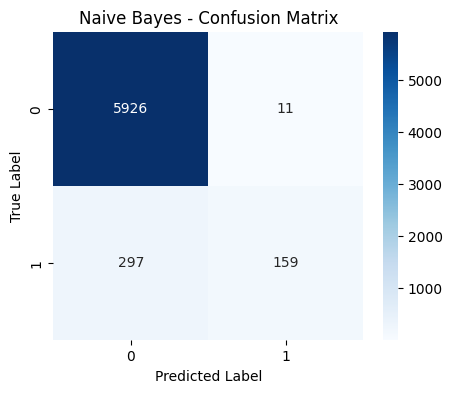

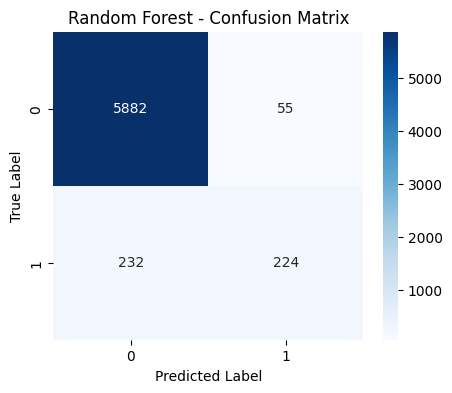

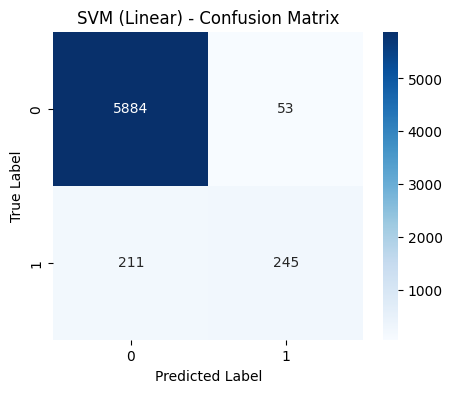

In [17]:
for name, model in models.items():
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

10. Custom Prediction

In [25]:

best_model = models["SVM (Linear)"]

def predict_hate_speech(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned])
    pred = best_model.predict(vector)[0]
    
    labels = {0: "🟥 Hate Speech", 1: "🟧 Offensive Language", 2: "🟩 Neutral / Normal"}
    print(f"Text: {text}")
    print("Prediction:", labels[pred],"\n")
    

test_examples = [
    "I hate those people so much!",                
    "You're such an idiot!",                       
    "Have a wonderful day my friend!",             
    "All immigrants should leave the country!",    
    "This movie is so stupid and boring!",         
    "I love everyone equally!",                    
]

for text in test_examples:
    predict_hate_speech(text)


Text: I hate those people so much!
Prediction: 🟥 Hate Speech 

Text: You're such an idiot!
Prediction: 🟥 Hate Speech 

Text: Have a wonderful day my friend!
Prediction: 🟥 Hate Speech 

Text: All immigrants should leave the country!
Prediction: 🟧 Offensive Language 

Text: This movie is so stupid and boring!
Prediction: 🟥 Hate Speech 

Text: I love everyone equally!
Prediction: 🟥 Hate Speech 

